In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from pylab import rcParams
rcParams['figure.figsize'] = 20, 5 

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r'C:\Users\TEJKIRAN\Desktop\Datasets\Electric_Production.csv',parse_dates=['DATE'], index_col='DATE')
df.head()

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [15]:
test = df.iloc[-79:]

In [12]:
train = df.iloc[:-79]

In [18]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [22]:
resu = []
temp_df = pd.DataFrame()
#df2 = pd.DataFrame(columns=['smoothing parameter', 'RMSE'])
for i in [0 , 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90,1]:
    print(f'Fitting for smoothing level= {i}')
    fit_v = SimpleExpSmoothing(np.asarray(train)).fit(i)
    fcst_pred_v= fit_v.forecast(79)
    timeseries_evaluation_metrics_func(test,fcst_pred_v)
    rmse = np.sqrt(metrics.mean_squared_error(test, fcst_pred_v))
    df3 = {'smoothing parameter':i, 'RMSE': rmse}
    temp_df = temp_df.append(df3, ignore_index=True)
temp_df.sort_values(by=['RMSE']).head(3)

Fitting for smoothing level= 0
Evaluation metric results:-
MSE is : 392.4771140477675
MAE is : 17.315735852809098
RMSE is : 19.81103515841026
MAPE is : 16.137242552486345
R2 is : -3.2364736767719444

Fitting for smoothing level= 0.1
Evaluation metric results:-
MSE is : 96.27996803988138
MAE is : 8.201594778250696
RMSE is : 9.812235629044045
MAPE is : 7.869172880154239
R2 is : -0.03926454715970662

Fitting for smoothing level= 0.2
Evaluation metric results:-
MSE is : 100.43728155011814
MAE is : 8.334338242288363
RMSE is : 10.021840227728546
MAPE is : 7.931861542756878
R2 is : -0.08413939112338009

Fitting for smoothing level= 0.3
Evaluation metric results:-
MSE is : 107.03425886606037
MAE is : 8.556170393960413
RMSE is : 10.345736265054333
MAPE is : 8.074573204569123
R2 is : -0.15534843681018007

Fitting for smoothing level= 0.4
Evaluation metric results:-
MSE is : 112.30794643826634
MAE is : 8.734966480684022
RMSE is : 10.59754435887231
MAPE is : 8.203026335996134
R2 is : -0.2122736377

,smoothing parameter,RMSE
10,1.0,9.625645
9,0.9,9.695743
1,0.1,9.812236


In [25]:
#using values from grid search
data = SimpleExpSmoothing(np.asarray(train)).fit( smoothing_level = 0.1,optimized= False)
data_pred = data.forecast(79)
timeseries_evaluation_metrics_func(test,data_pred)

Evaluation metric results:-
MSE is : 96.27996803988138
MAE is : 8.201594778250696
RMSE is : 9.812235629044045
MAPE is : 7.869172880154239
R2 is : -0.03926454715970662



In [27]:
#Automated smoothing_level
data_auto = SimpleExpSmoothing(np.asarray(train)).fit( optimized= True, use_brute = True)
data_auto_pred = data_auto.forecast(79)
timeseries_evaluation_metrics_func(test,data_auto_pred)

Evaluation metric results:-
MSE is : 92.65304541508331
MAE is : 8.129484798093825
RMSE is : 9.625645194743223
MAPE is : 7.953514078954105
R2 is : -0.00011484472438061388



In [28]:
data_auto.summary()

Dep. Variable:,endog,No. Observations:,318
Model:,SimpleExpSmoothing,SSE,16755.367
Optimized:,True,AIC,1264.686
Trend:,None,BIC,1272.210
Seasonal:,None,AICC,1264.814
Seasonal Periods:,None,Date:,"Wed, 15 May 2024"
Box-Cox:,False,Time:,16:23:53
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
initial_level,72.505157,l.0,True


In [61]:
df_data_gs_pred = pd.DataFrame(data_pred, columns=['Close_auto_search'])
df_data_gs_pred["new_index"] = df.index[-79:]
df_data_gs_pred = df_data_gs_pred.set_index("new_index")

In [62]:
df_data_auto_pred = pd.DataFrame(data_auto_pred, columns=['Close_auto_search'])
df_data_auto_pred["new_index"] = df.index[-79:]
df_data_auto_pred = df_data_auto_pred.set_index("new_index")

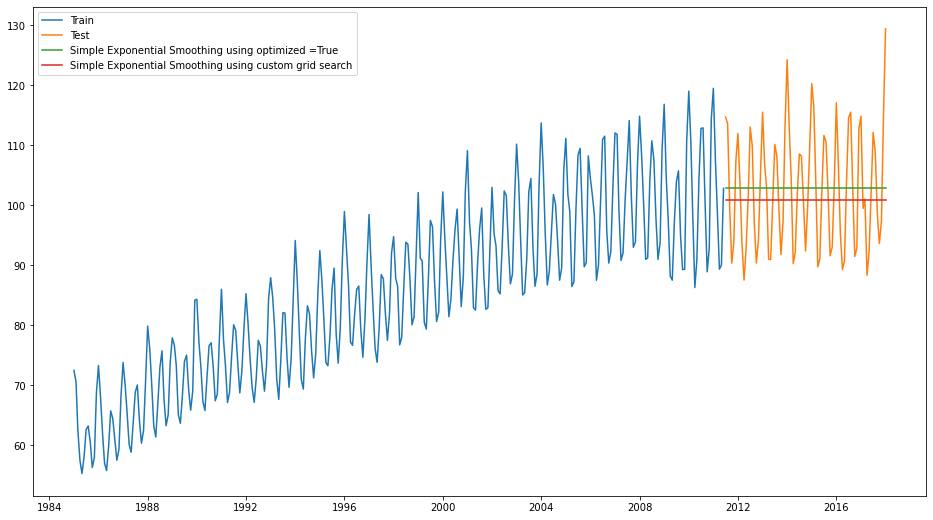

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [16,9]
plt.plot( train, label='Train')
plt.plot(test, label='Test')
plt.plot(df_data_auto_pred, label='Simple Exponential Smoothing using optimized =True')
plt.plot(df_data_gs_pred, label='Simple Exponential Smoothing using custom grid search')
plt.legend(loc='best')
plt.show()